Importing all the necessary requirements

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
# Naming the columns
columns = ['sepal_length','sepal_width','petal_length','petal_width','type']

In [7]:
# Reading the dataset
df = pd.read_csv('iris.csv', names = columns)

In [8]:
print("Printing the first 5 rows")
print(df.head())
print('----------------------------')
print("Printing the columns of the dataframe")
print(df.columns)
print('----------------------------')
print("Printing the shape of the dataframe")
print(df.shape)
print('----------------------------')
print("Printing the size of the dataframe")
print(df.size)
print('----------------------------')
print("Printing the number of value for each type")
print(df['type'].value_counts())
print('----------------------------')

Printing the first 5 rows
   sepal_length  sepal_width  petal_length  petal_width         type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
----------------------------
Printing the columns of the dataframe
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')
----------------------------
Printing the shape of the dataframe
(150, 5)
----------------------------
Printing the size of the dataframe
750
----------------------------
Printing the number of value for each type
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: type, dtype: int64
----------------------------


Since, the number of entries for each type is 50, i.e. it is equal. Hence, it is a balanced dataset.

In [9]:
# Univariate Analysis
iris = df
iris_setosa = iris.loc[iris["type"]=="Iris-setosa"]
iris_virginica = iris.loc[iris["type"]=="Iris-virginica"]
iris_versicolor = iris.loc[iris["type"]=="Iris-versicolor"]

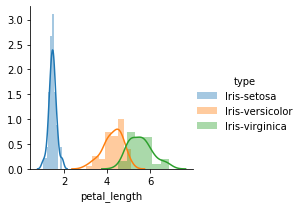

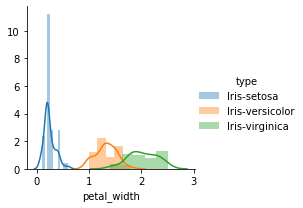

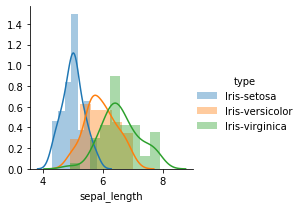

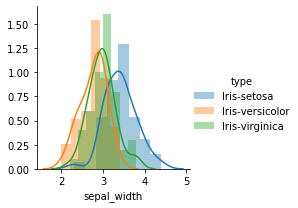

In [10]:
# Plotting histogram for each feature
sns.FacetGrid(iris,hue="type",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="type",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="type",size=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(iris,hue="type",size=3).map(sns.distplot,"sepal_width").add_legend()
# plt.show()

From this histogram, we come to know that using petal_length, we can seperate "Iris-setosa" from the two others. But the other features cannot be used to seperate any of the types. In petal_width, the distribution is quite irregular. The distibution of the three types of Iris wrt sepal_length and sepal_width is mixed up.(i.e. messy)

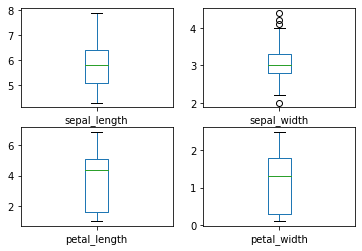

In [11]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

The box-plot with respect to each of the features is plotted. Outliers are seen in sepal_width.

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


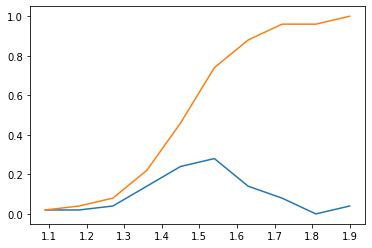

[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


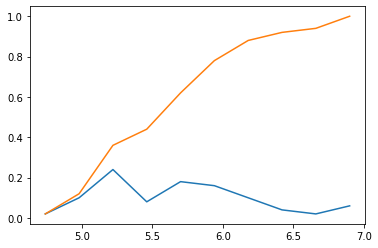

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


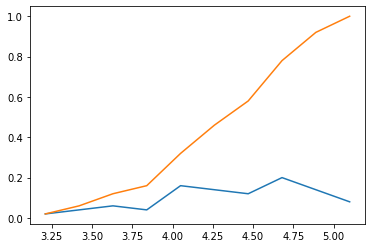

In [12]:
# Binning 
#for iris_setosa
counts,bin_edges=np.histogram(iris_setosa["petal_length"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#for iris_virginica
counts,bin_edges=np.histogram(iris_virginica["petal_length"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#for iris_versicolor
counts,bin_edges=np.histogram(iris_versicolor["petal_length"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

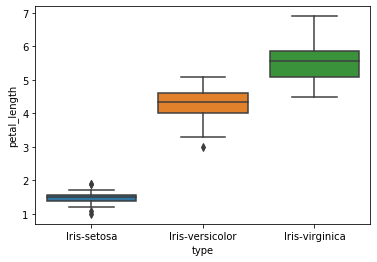

In [13]:
sns.boxplot(x="type",y="petal_length",data=df)
plt.show()

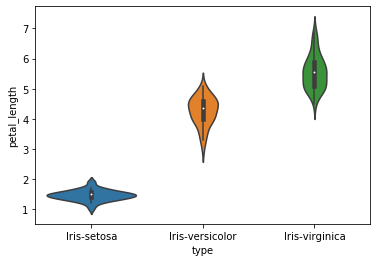

In [14]:
sns.violinplot(x="type",y="petal_length",data=iris)
plt.show()

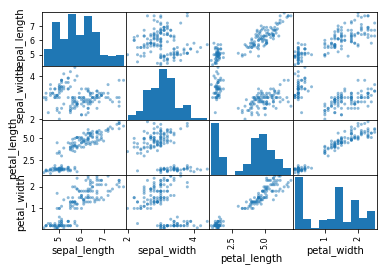

In [15]:
# Bivariate Analysis
scatter_matrix(iris)
plt.show()

This shows a correlation matrix between all the features.

In [16]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

We are using the 80-20 rule to split the dataset into train and test samples.

In [17]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

We will use 10-fold cross validation to estimate accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

We are going to test the following algorithms to know which one is the best to to take care of our data set:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [18]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


Since, SVM gives the best output as 0.99, we use SVM to make predictions.

In [19]:
# Make predictions on validation dataset
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)
predictions = svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



Thus, we were able to make predictions with 93% accuracy.